In [15]:
# Importing the libraries and deriving functions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from typing import Tuple, List, Dict
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA

filename = 'datasets/sensor_readings.csv'
df = pd.read_csv(filename)

def rand_cols(features, min_value, max_value):
    if max_value - min_value + 1 < features:
        raise ValueError('The number of features exceeds the range of values')
    return random.sample(range(min_value, max_value + 1), features)

def random_rows(length, min_value, max_value):
    if max_value - min_value + 1 < length:
        raise ValueError('The number of rows exceeds the range of values')
    return random.sample(range(min_value, max_value + 1), length)

def get_equally_spaced_index(csv_path, num_indices):
    """
    Finds the upper and lower bounds of the index in a CSV file,
    and returns an equally spaced index with a specified number of points.

    Args:
        csv_path (str): The path to the CSV file.
        num_indices (int): The number of equally spaced indices to return.

    Returns:
        numpy.ndarray: An array of equally spaced indices.
    """
    df = pd.read_csv(csv_path)

    lower_bound = df.index.min()
    upper_bound = df.index.max()

    return np.linspace(lower_bound, upper_bound, num_indices)

def calc_cov_matrix(matrix):
    """
    Calculates the covariance matrix of a given matrix.

    Args:
        matrix (numpy.ndarray): A 2D numpy array representing the data matrix,
                                where rows are variables and columns are observations.

    Returns:
        numpy.ndarray: The covariance matrix of the input matrix.
    """
    # Calculate the mean of each row (variable)
    mean_rows = np.mean(matrix, axis=0, keepdims=True)

    # Center the data by subtracting the mean of each row
    centered_data = matrix - mean_rows

    # Calculate the covariance matrix
    n_observations = matrix.shape[1]
    covariance_matrix = (centered_data @ centered_data.T) / (n_observations - 1)

    return covariance_matrix

# Generate random list of integers for selecting columns (sample size)
n_features = 5
min_feature = 0
max_feature = 9

# Generate random list of integers for selecting rows (sample size)
n_samples = 100
minimum_value = 0
maximum_value = 999

select_col = rand_cols(n_features, min_feature, max_feature)
sort_col = sorted(select_col)
sensor_df = pd.read_csv(filename, usecols=sort_col)
mean_data = sensor_df.mean()
max_values = sensor_df.max().max()
min_values = sensor_df.min().min()

# Milestone: Random Variables and Covariance Theory
Contributors: 
Aaron Romero
Rodney Buller

The following project will review the data from Sensor Readings (`sensor_readings.csv`). 


## Learning Objectives
We have begun with ploting the raw data to understand what the data looks like and see if we can there are any patterns that immediatly standout. The csv data has been converted to a dataframe using pandas show ten sensors (features) with 1000 observations. The diagonal of this pairplot displays a histogram of normal distribution of data for each sensor and the off data presents the the bivariate dataset of two sensors. The upper diagonal has the mean plotted with a dashed red line and all scatter plots have the linear regression line plotted with a solid green line. From this initial plot we can see that the linear regression is most likely equally to zero because they all have a slope of a slope close to zero or zero. 

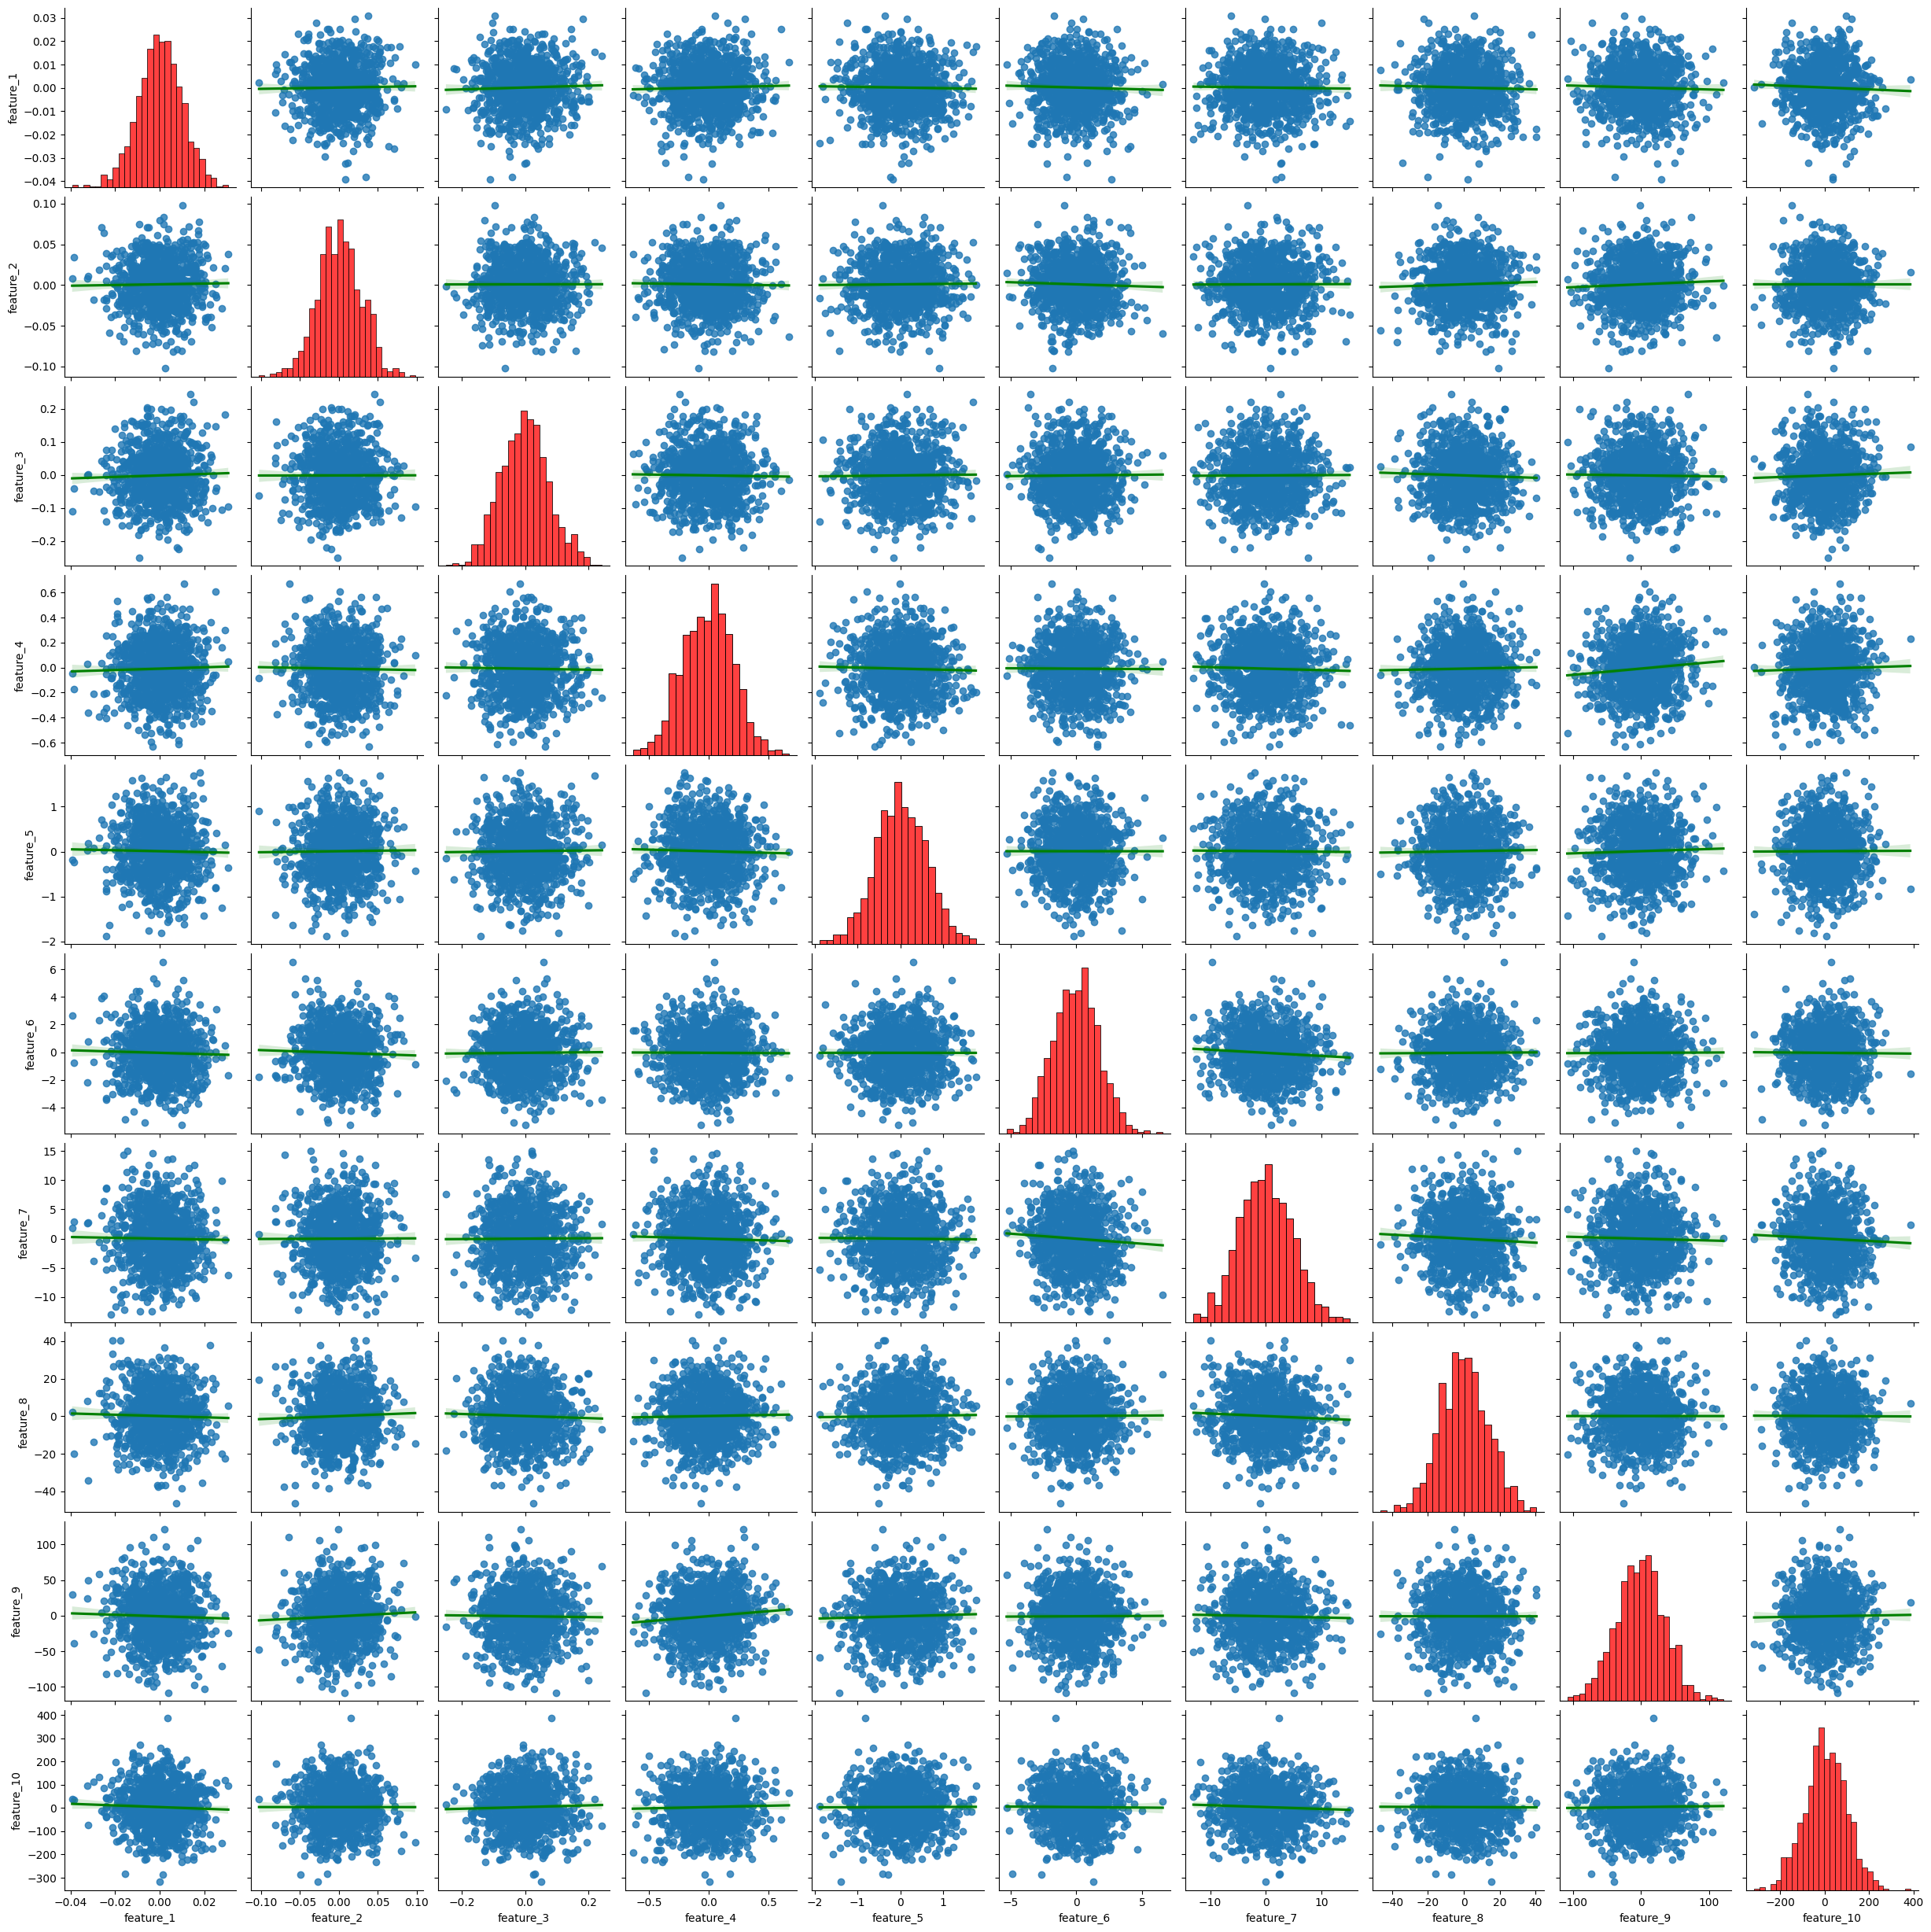

In [4]:
pairplot = sns.pairplot(df, kind='reg', diag_kws={'color':'red'}, plot_kws={'line_kws':{'color':'green'}})

## Sampling and Centering the Data
To reduce the amount of noise and to better see the data. We will randomly n number of sensors and n number of observations. With the same data, we will plot on a heatmap to show correlation between the data (if any). The value of 1 shows a strong correlation and 0 meaning no correlation. The correlation is caculated by first calculating the mean of the data then calculating the covariance. Lastly we take the covarinance of the bivariant data to calculate the correlation using the equations below. 

**Covariance**
\begin{equation} 
s_{xy} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{n-1} \tag 1
\end{equation}
**Correlation**
\begin{equation} 
r = \frac{s_{xy}} {s_x s_y} \frac{(Covariance)} {(Standard Deviation)}\tag 2
\end{equation}

C:\Users\rodne\AppData\Local\Temp\ipykernel_920\992034613.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax_centered.axvline(mean_data[j], color='r', linestyle='--')


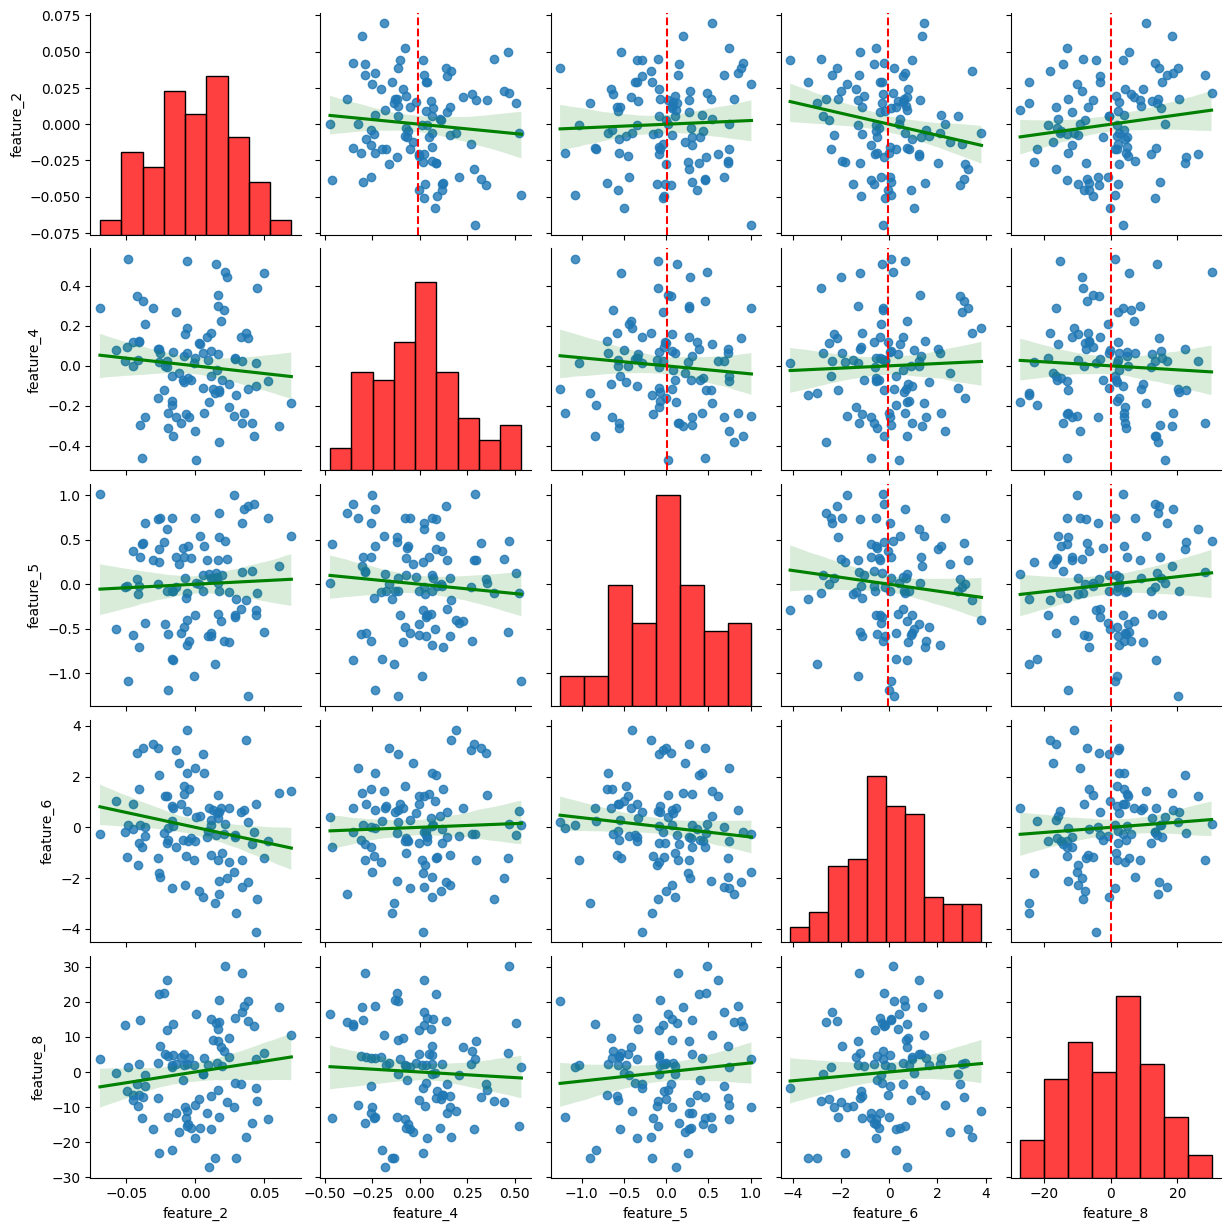

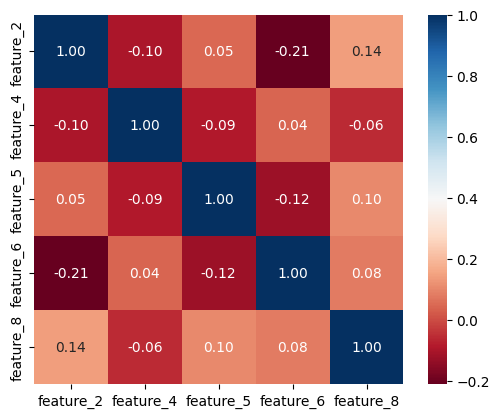

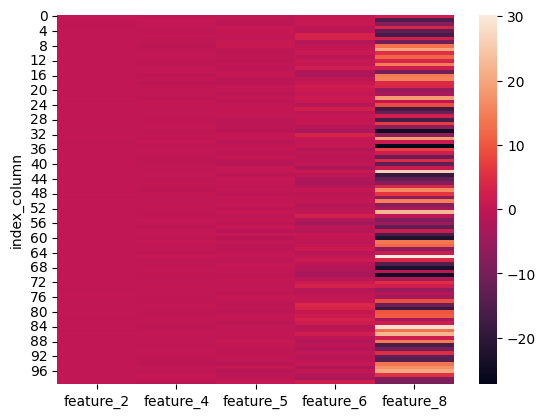

In [10]:
# Generate random list of integers
random_integer_list = random_rows(n_samples, minimum_value, maximum_value) 
row_sorted = sorted(random_integer_list)
        
selected_rows = sensor_df.iloc[row_sorted]

#Create a new dataframe with the selected rows
s_df = pd.DataFrame(selected_rows)
#Save the sample dataframe to a csv file
s_df.to_csv('datasets/sample_data.csv', index=False)

#Read from new sample CSV file
s_filename = 'datasets/sample_data.csv'
sample_df = pd.read_csv(s_filename)

sample_mean = sample_df.select_dtypes(include='number').mean()
df_centered = sample_df.select_dtypes(include='number') - sample_mean

pairplot = sns.pairplot(df_centered, kind='reg', diag_kws={'color':'red'}, plot_kws={'line_kws':{'color':'green'}})
        
for i, j in zip(*np.triu_indices_from(pairplot.axes, 1)):
    ax_centered = pairplot.axes[i, j]
    # Add vertical line at mean of x-axis
    ax_centered.axvline(mean_data[j], color='r', linestyle='--')
    # Add horizontal line at mean of y-axis 
    #ax_centered.axhline(means_centered[i], color='r', linestyle='--')
plt.show(pairplot)

df_centered_corr = df_centered.corr()
#data_to_plot = df_centered_corr.iloc[:-1, :-1] # Excluding the last row and column as they are not needed
heatmap_corr = sns.heatmap(df_centered_corr, cmap='RdBu', annot=True, square=True, fmt=".2f")
plt.show(heatmap_corr)

## Data Observation with Heatmap
It may be worth noting the pairplot does reveal that the first sets of sensor maintain a very small standard deviation and the later sensor (feature_6 and higher) have a greater standard deviation. This is also noted on the heatmap with the observations being indexed. The later sensors have a greater varition in coloring which shows a greater scaling. 

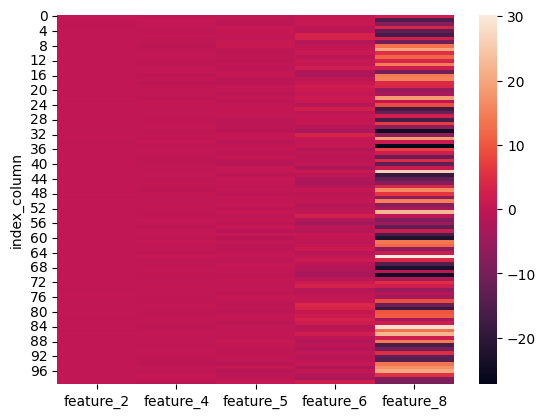

In [12]:
df_centered['index_column'] = range(len(df_centered))
sensor_df_heatmap = df_centered.set_index('index_column') # Set the new index as the index
heatmap = sns.heatmap(sensor_df_heatmap)
plt.show(heatmap)

In [11]:
# Calculate the covariance matrix of the centered data
cov = np.cov(df_centered.T)
#print(cov)
print(f"Is symmetric: {np.allclose(cov, cov.T)}")
eigenvals = np.linalg.eigvals(cov)
print(f"Eigenvalues: {eigenvals}")
print(f"Condition number: {np.linalg.cond(cov)}")

Is symmetric: True
Eigenvalues: [8.42050933e+02 1.64448172e+02 2.61010133e+00 7.96044269e-04
 5.08684697e-02 2.58041075e-01]
Condition number: 1057794.1019314644


## Principal Component Analysis (PCA) and Singular Value Decomposition (SVD)

Looking at the data on the cumulative variance we can see the data has a high degree of dispersion with a total variance of just under 1000. The graph below shows the cumulative variance of the 10 features using equation 3 as:<br />
Feature 1: 1.13596223 <br />
Feature 2: 2.20973222 <br />
Feature 3: 3.26837933 <br />
Feature 4: 4.31051683 <br />
Feature 5: 5.33925155 <br />
Feature 6: 6.33958763 <br />
Feature 7: 7.30974796 <br />
Feature 8: 8.25335993 <br />
Feature 9: 9.14775465 <br />
Feature 10: 10.01001001<br />

**Variance**
\begin{equation} 
s^2_{x} = \frac{\sum (x_i - \bar{x})^2}{n-1} \tag 3
\end{equation}

The mean of each feature is:
feature_1     0.000108
feature_2     0.000871
feature_3    -0.001745
                ...   
feature_8     0.070976
feature_9    -0.830300
feature_10    3.810474
Length: 10, dtype: float64
 With variance:
feature_1        0.000101
feature_2        0.000799
feature_3        0.005797
                 ...     
feature_8      177.299477
feature_9     1257.796154
feature_10    8935.616592
Length: 10, dtype: float64
The total variance is: 9999.999999999996

Explained Variance Ratio:
 [1.13596223 1.07377    1.05864711 1.0421375  1.02873472 1.00033608
 0.97016033 0.94361197 0.89439472 0.86225536]

Cumulative Explained Variance:
 [ 1.13596223  2.20973222  3.26837933  4.31051683  5.33925155  6.33958763
  7.30974796  8.25335993  9.14775465 10.01001001]


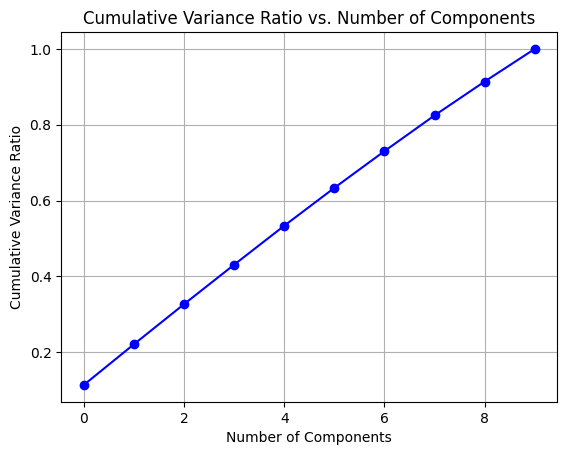

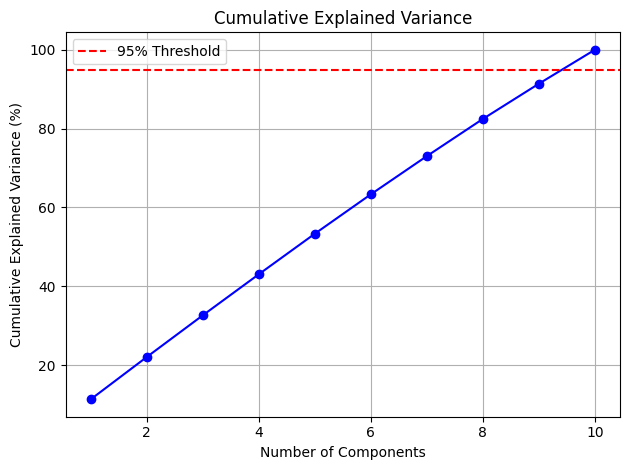

In [27]:
sensor_df = pd.read_csv(filename)
#Assigning the .csv file to the variable X and getting the mean of each feature (Column)
X = sensor_df
X.mean(axis=0)

#testing out the full_matrices
X1 = sensor_df.values

U1, s1, Vh1 = np.linalg.svd(X1, full_matrices=True)

#Scaling the data set
sensor_sc_df = StandardScaler().fit_transform(sensor_df)

#Find the SVD to get the U, s and Vh values
U, s, Vh = np.linalg.svd(sensor_sc_df)

#Squaring the singular value, s, to find the variances
var = np.square(s)

#Finding the total variance
total_var = np.sum(var)
print(f'The mean of each feature is:\n{X.mean(axis=0)}\n With variance:\n{X.var(axis=0)}')
print("The total variance is:", total_var)

sensor_pca = PCA(n_components=10)
sensor_pca.fit(sensor_sc_df)

#Verifying the Explained and Cumulative Variances
exp_var_ratio = sensor_pca.explained_variance_ratio_
exp_var_ratio

cum_var_ratio = np.cumsum(exp_var_ratio)
cum_var_ratio

#Threshold evaluation to determine number of components
threshold = 0.95
n_components = np.argmax(cum_var_ratio >= threshold) + 1
n_components

#Threshold adjustment to see how changing it various the number of components
threshold_adj = 0.85
n_comps = np.argmax(cum_var_ratio >= threshold_adj) + 1
n_comps


#Printing the values of the Explained Variance and the Cumulative Variance
print("\nExplained Variance Ratio:\n", sensor_pca.explained_variance_)
print("\nCumulative Explained Variance:\n", sensor_pca.explained_variance_.cumsum())

#Plotting the cumulative variance
plt.plot(cum_var_ratio, 'bo-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Cumulative Variance Ratio vs. Number of Components")
plt.grid()
plt.show()

#Plotting Cumulative Variance with 95% Threshold limit indicated
plt.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio * 100, 'bo-')
plt.axhline(y=95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


### Plotting Both Explained Variances and Cumulative Variances
With the bar chart the variance is further shown to have little variance. The bars have little variance. The scree plot will show no elbow which so all 10 components would be used. 

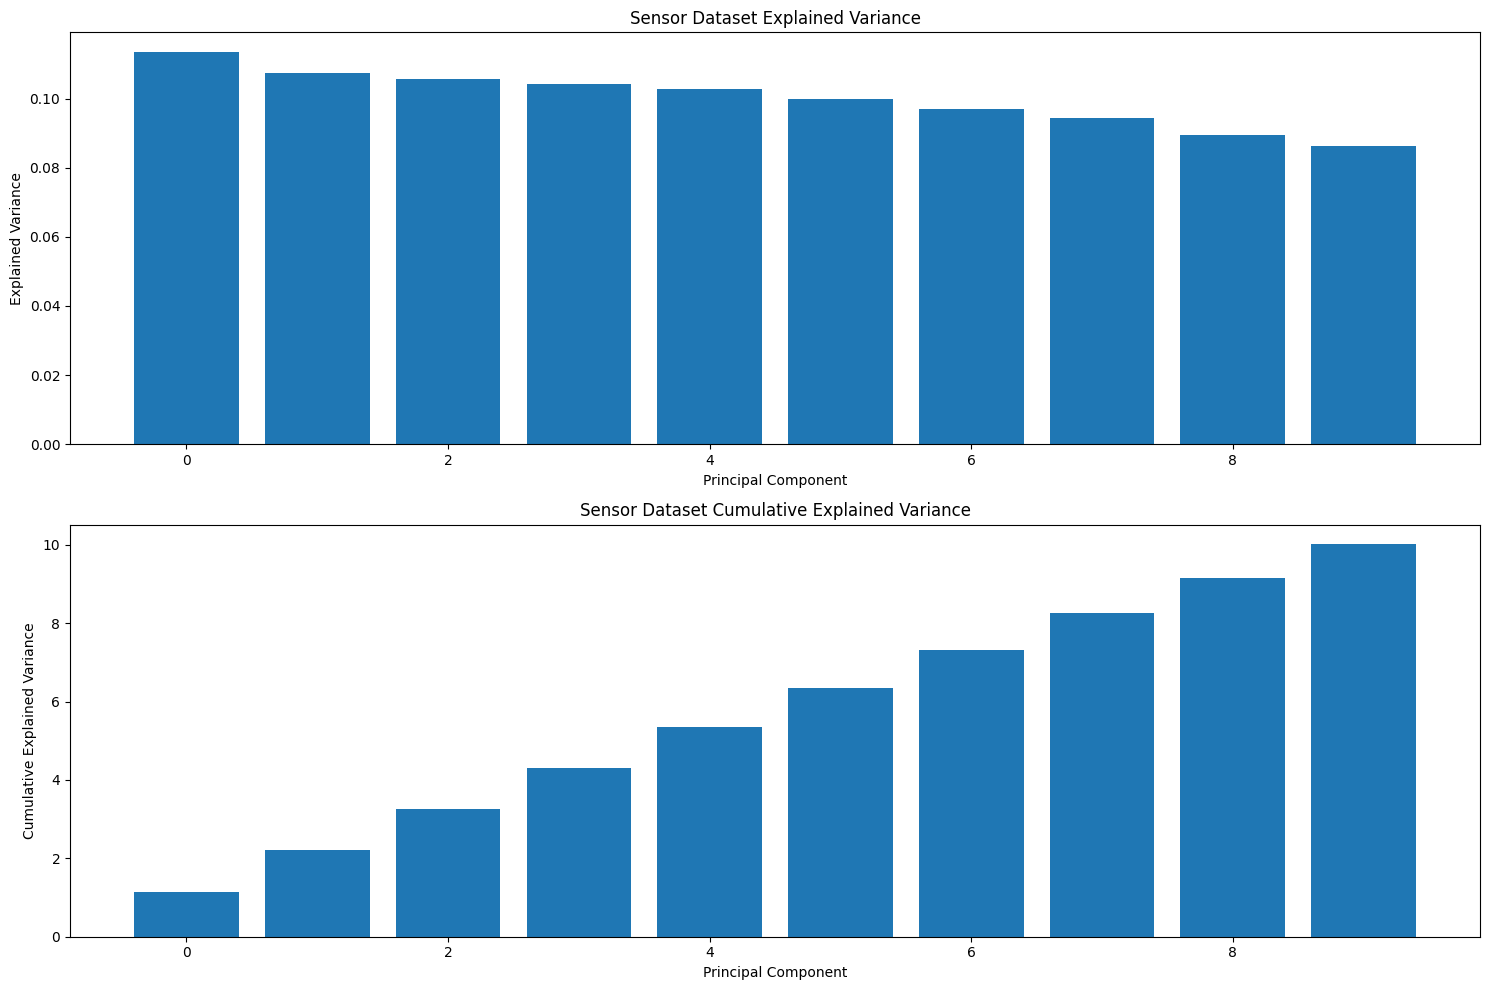

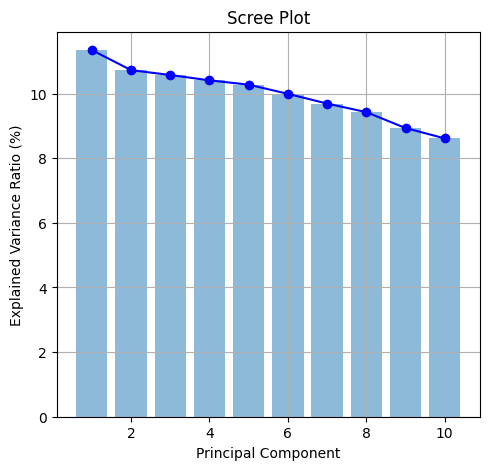

In [28]:
#Plotting Both Explained Variances and Cumulative Variances
fig, axes = plt.subplots(2, 1, figsize=(15,10))
axes[0].bar(range(len(sensor_pca.explained_variance_ratio_)), sensor_pca.explained_variance_ratio_)
axes[0].set_title('Sensor Dataset Explained Variance')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance')

axes[1].bar(range(len(sensor_pca.explained_variance_ratio_)), sensor_pca.explained_variance_.cumsum())
axes[1].set_title('Sensor Dataset Cumulative Explained Variance')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

#Closer look at the scree plot for the explained variance scree plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(exp_var_ratio) + 1), exp_var_ratio * 100, alpha=0.5, label='Individual')
plt.plot(range(1, len(exp_var_ratio) + 1), exp_var_ratio * 100, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Scree Plot')
plt.grid(True)